In [1]:
!pip install git+https://github.com/ultralytics/ultralytics.git@main

  Cloning https://github.com/ultralytics/ultralytics.git (to revision main) to /tmp/pip-req-build-6r9benz5
  Running command git clone --filter=blob:none --quiet https://github.com/ultralytics/ultralytics.git /tmp/pip-req-build-6r9benz5
  Resolved https://github.com/ultralytics/ultralytics.git to commit e3a538bbde1212791c52b3fa1ecabc2481c85d8f
  Preparing metadata (setup.py) ... done
  Created wheel for ultralytics: filename=ultralytics-8.0.208-py3-none-any.whl size=654531 sha256=e948b133fc8eb39c87e5330b515506ca6f127af2a73cd0187f8e4c8e512c234e
  Stored in directory: /tmp/pip-ephem-wheel-cache-p5nmffg4/wheels/60/db/e5/6abbdd13b4e3d5e2fdcd87690cd8738f842eeb37142fdccb5b
Successfully built ultralytics


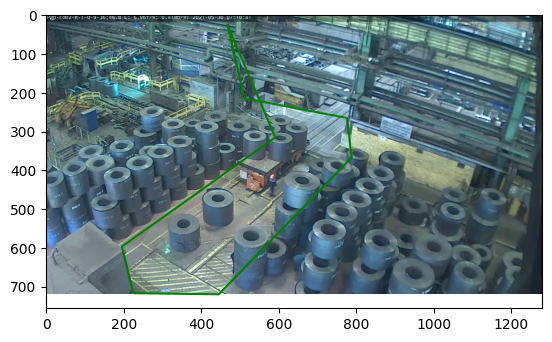

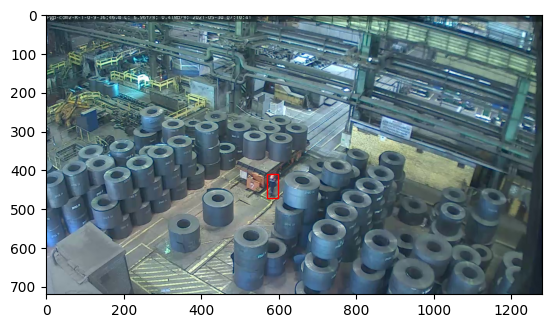

In [2]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

def read_annotation_file(annotation_path):
    """
    Чтение аннотации из файла в формате Yolo.
    Возвращает список кортежей (class, x, y, width, height).
    """
    annotations = []
    with open(annotation_path, 'r') as file:
        for line in file:
            data = line.strip().split()
            if data:
                obj_class, x, y, width, height = map(float, data)
                annotations.append((obj_class, x, y, width, height))
    return annotations

def plot_image_with_annotations(image_path, annotations):
    """
    Отрисовка изображения с прямоугольниками, соответствующими аннотациям.
    """
    img = plt.imread(image_path)
    fig, ax = plt.subplots(1)
    ax.imshow(img)

    for annotation in annotations:
        obj_class, x, y, width, height = annotation
        absolute_x = x * img.shape[1]
        absolute_y = y * img.shape[0]
        absolute_width = width * img.shape[1]
        absolute_height = height * img.shape[0]

        rect = patches.Rectangle(
            (absolute_x - absolute_width / 2, absolute_y - absolute_height / 2),
            absolute_width,
            absolute_height,
            linewidth=1,
            edgecolor='r',
            facecolor='none'
        )
        ax.add_patch(rect)

    plt.show()

def visualize_danger_zones(image_path, danger_zones):
    """
    Отрисовка изображения с опасными зонами.
    """
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    fig, ax = plt.subplots(1)
    ax.imshow(img)

    danger_zones = [(point[0], point[1]) for point in danger_zones]
    danger_zones.append(danger_zones[0])  # Замыкание полигона

    xs, ys = zip(*danger_zones)
    ax.plot(xs, ys, 'g-')

    plt.show()

# Пример использования
image_folder = '/kaggle/input/hacksaidangerous/cameras/Pgp-com2-K-1-0-9-36'
annotation_folder = image_folder
danger_zone_file = '/kaggle/input/hacksaidangerous/danger_zones/danger_Pgp-com2-K-1-0-9-36.txt'

image_file = '0068bb1d-0521-4240-b7fe-7802ff2788ce.jpg'
annotation_file = '0068bb1d-0521-4240-b7fe-7802ff2788ce.txt'
image_path = os.path.join(image_folder, image_file)
annotation_path = os.path.join(annotation_folder, annotation_file)

annotations = read_annotation_file(annotation_path)

# Чтение опасных зон
with open(danger_zone_file, 'r') as f:
    danger_zones = [list(map(int, point.strip()[1:-2].split(', '))) for point in f]

# Перевернем изображение, так как визуализация danger zones требует другого формата координат
visualize_danger_zones(image_path, danger_zones[::-1])

plot_image_with_annotations(image_path, annotations)

In [3]:
from skimage.metrics import structural_similarity as ssim
import cv2

image1 = cv2.imread("/kaggle/input/hacksaidangerous/cameras/DpR-Csp-uipv-ShV-V1/007abb91-8834-416d-9e69-4bfcf66632c1.jpg")
image2 = cv2.imread("/kaggle/input/hacksaidangerous/cameras/Php-Angc-K3-8/Php-Angc-K3-8_angc4fr0.jpg")
def resize_images(image1, image2):
    # Приведем изображения к одинаковому размеру
    min_height = min(image1.shape[0], image2.shape[0])
    min_width = min(image1.shape[1], image2.shape[1])
    
    resized_image1 = cv2.resize(image1, (min_width, min_height))
    resized_image2 = cv2.resize(image2, (min_width, min_height))
    
    return resized_image1, resized_image2


resized_image1, resized_image2 = resize_images(image1, image2)

gray_image1 = cv2.cvtColor(resized_image1, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(resized_image2, cv2.COLOR_BGR2GRAY)

ssim_value, _ = ssim(gray_image1, gray_image2, full=True)
print("SSIM:", ssim_value)



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


SSIM: 0.19273414376161035


In [4]:
image_file

'0068bb1d-0521-4240-b7fe-7802ff2788ce.jpg'

In [5]:
from torch.utils.data import Dataset, DataLoader
import cv2
import os
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tifffile


# Создание датасета

In [6]:
import shutil
import os

source_folder = '/kaggle/input/hacksaidangerous/cameras/'
destination_folder = '/kaggle/working/cameras/'

# Проверяем, существует ли папка, прежде чем создавать
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)
    print(f"Папка {destination_folder} создана успешно.")
else:
    print(f"Папка {destination_folder} уже существует.")

# Копируем содержимое
shutil.copytree(source_folder, destination_folder, dirs_exist_ok=True)



Папка /kaggle/working/cameras/ создана успешно.


'/kaggle/working/cameras/'

In [7]:
import os
import csv
import shutil

source_folder = '/kaggle/working/cameras/'
destination_folder = '/kaggle/working/train/'

# Создаем папку train, если ее еще нет
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Создаем CSV-файл
csv_file_path = '/kaggle/working/train_annotations.csv'
with open(csv_file_path, mode='w', newline='') as csv_file:
    fieldnames = ['Image Path', 'Object Class', 'X', 'Y', 'Width', 'Height']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    
    # Записываем заголовок
    writer.writeheader()
    
    # Обрабатываем каждую папку с картинками и аннотациями
    for folder_name in os.listdir(source_folder):
        folder_path = os.path.join(source_folder, folder_name)
        
        # Перемещаем все изображения в папку "train"
        for file_name in os.listdir(folder_path):
            if file_name.endswith(('.jpg', '.jpeg', '.png')):
                image_path = os.path.join(folder_path, file_name)
                destination_path = os.path.join(destination_folder, file_name)
                shutil.move(image_path, destination_path)
                
                # Читаем соответствующую аннотацию
                annotation_file_path = os.path.join(folder_path, file_name.replace('.jpg', '.txt'))
                if os.path.exists(annotation_file_path):
                    with open(annotation_file_path, 'r') as annotation_file:
                        for line in annotation_file:
                            data = line.strip().split()
                            if data:
                                object_class, x, y, width, height = map(float, data)
                                writer.writerow({
                                    'Image Path': destination_path,
                                    'Object Class': object_class,
                                    'X': x,
                                    'Y': y,
                                    'Width': width,
                                    'Height': height
                                })

print(f"CSV-файл создан по пути: {csv_file_path}")


CSV-файл создан по пути: /kaggle/working/train_annotations.csv


In [8]:
import pandas as pd

# Ваши функции
def convert_relative_to_absolute(relative_coord, image_size):
    x_center, y_center, box_width, box_height = relative_coord
    image_width, image_height = image_size
    x_abs = int((x_center - box_width / 2) * image_width)
    y_abs = int((y_center - box_height / 2) * image_height)
    w_abs = int(box_width * image_width)
    h_abs = int(box_height * image_height)
    return x_abs, y_abs, w_abs, h_abs

# Чтение CSV-файла
csv_file_path = '/kaggle/working/train_annotations.csv'
df = pd.read_csv(csv_file_path)

# Получение размеров изображений из путей
df['Image Size'] = df['Image Path'].apply(lambda path: Image.open(path).size)

# Применение функций для преобразования координат в DataFrame
df[['X', 'Y', 'Width', 'Height']] = df.apply(
    lambda row: convert_relative_to_absolute(row[['X', 'Y', 'Width', 'Height']], row['Image Size']),
    axis=1,
    result_type='expand'
)

# Сохранение измененного DataFrame в CSV
df.to_csv('/kaggle/working/train_annotations_absolute.csv', index=False)

In [9]:
df = pd.read_csv('/kaggle/working/train_annotations_absolute.csv')
df

,Image Path,Object Class,X,Y,Width,Height,Image Size
0,/kaggle/working/train/256nz1_231.jpg,0.0,117,110,30,89,"(1920, 1080)"
1,/kaggle/working/train/256nz1_231.jpg,0.0,87,118,34,94,"(1920, 1080)"
2,/kaggle/working/train/256nz1_231.jpg,0.0,186,160,66,126,"(1920, 1080)"
3,/kaggle/working/train/256nz1_231.jpg,0.0,13,175,49,108,"(1920, 1080)"
4,/kaggle/working/train/256zm1_102.jpg,0.0,13,199,56,139,"(1920, 1080)"
...,...,...,...,...,...,...,...
5063,/kaggle/working/train/20211204092943120_UTC+03...,0.0,992,592,83,106,"(1280, 720)"
5064,/kaggle/working/train/20211204092944680_UTC+03...,0.0,1093,554,74,100,"(1280, 720)"
5065,/kaggle/working/train/20211204093121119_UTC+03...,0.0,1226,491,52,81,"(1280, 720)"
5066,/kaggle/working/train/20211204093115918_UTC+03...,0.0,1061,575,82,90,"(1280, 720)"


# Обработка данных

In [10]:
destination_folder = '/kaggle/working/data/'

# Создаем папку train, если ее еще нет
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

In [11]:
df

,Image Path,Object Class,X,Y,Width,Height,Image Size
0,/kaggle/working/train/256nz1_231.jpg,0.0,117,110,30,89,"(1920, 1080)"
1,/kaggle/working/train/256nz1_231.jpg,0.0,87,118,34,94,"(1920, 1080)"
2,/kaggle/working/train/256nz1_231.jpg,0.0,186,160,66,126,"(1920, 1080)"
3,/kaggle/working/train/256nz1_231.jpg,0.0,13,175,49,108,"(1920, 1080)"
4,/kaggle/working/train/256zm1_102.jpg,0.0,13,199,56,139,"(1920, 1080)"
...,...,...,...,...,...,...,...
5063,/kaggle/working/train/20211204092943120_UTC+03...,0.0,992,592,83,106,"(1280, 720)"
5064,/kaggle/working/train/20211204092944680_UTC+03...,0.0,1093,554,74,100,"(1280, 720)"
5065,/kaggle/working/train/20211204093121119_UTC+03...,0.0,1226,491,52,81,"(1280, 720)"
5066,/kaggle/working/train/20211204093115918_UTC+03...,0.0,1061,575,82,90,"(1280, 720)"


In [12]:
import os
import shutil

# Укажите пути исходной и целевой папок
source_folder = '/kaggle/input/hacksaidangerous/cameras'
destination_folder = '/kaggle/working/train'

txt_files = [os.path.join(root, f) for root, dirs, files in os.walk(source_folder) for f in files if f.endswith('.txt')]

# Копируем каждый файл в целевую папку
for txt_file in txt_files:
    destination_path = os.path.join(destination_folder, os.path.basename(txt_file))
    shutil.copy(txt_file, destination_path)

print("Все файлы успешно скопированы.")


Все файлы успешно скопированы.


In [13]:
import shutil

# Укажите путь к папке, которую вы хотите очистить
folder_path = '/kaggle/working/data'

# Очищаем содержимое папки
shutil.rmtree(folder_path)

# После удаления, создаем пустую папку
os.makedirs(folder_path)

print(f"Папка {folder_path} успешно очищена.")


Папка /kaggle/working/data успешно очищена.


In [14]:
import os
import shutil

# Укажите пути исходной и целевой папок
source_folder = '/kaggle/input/hacksaidangerous/cameras'
destination_folder = '/kaggle/working/train'

# Рекурсивно получаем все файлы с расширением .txt из всех подпапок
txt_files = [os.path.join(root, f) for root, dirs, files in os.walk(source_folder) for f in files if f.endswith('.txt')]

# Копируем каждый файл в целевую папку
for txt_file in txt_files:
    destination_path = os.path.join(destination_folder, os.path.basename(txt_file))
    shutil.copy(txt_file, destination_path)

print("Все файлы успешно скопированы.")


Все файлы успешно скопированы.


In [15]:
import os
import shutil
from sklearn.model_selection import train_test_split

output_path = '/kaggle/working/data/'

# Создаем папки для train, val, test
for split in ['train', 'val', 'test']:
    os.makedirs(os.path.join(output_path, 'images', split), exist_ok=True)
    os.makedirs(os.path.join(output_path, 'annotations', split), exist_ok=True)

# Разделяем данные
df_train, df_temp = train_test_split(df, test_size=0.2, random_state=42)
df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=42)

# Переносим изображения и файлы аннотаций
def move_images_and_annotations(df_subset, split):
    for _, row in df_subset.iterrows():
        image_path = row['Image Path']
        annotation_path = image_path.replace('images', 'annotations').replace('.jpg', '.txt')

        destination_image_path = os.path.join(output_path, 'images', split, os.path.basename(image_path))
        destination_annotation_path = os.path.join(output_path, 'annotations', split, os.path.basename(annotation_path))

        shutil.copy(image_path, destination_image_path)
        shutil.copy(annotation_path, destination_annotation_path)

# Train
move_images_and_annotations(df_train, 'train')

# Val
move_images_and_annotations(df_val, 'val')

# Test
move_images_and_annotations(df_test, 'test')

In [16]:
import shutil

# Укажите текущее и новое названия папки
old_folder_name = '/kaggle/working/data/annotations'
new_folder_name = '/kaggle/working/data/labels'

# Переименовываем папку
shutil.move(old_folder_name, new_folder_name)

print(f"Папка успешно переименована в {new_folder_name}.")

Папка успешно переименована в /kaggle/working/data/labels.


In [17]:
import os

# Укажите путь к папке
folder_path = '/kaggle/working/data/labels/train'

# Получите список файлов в папке
file_list = os.listdir(folder_path)

# Получите количество файлов
number_of_files = len(file_list)

print(f"Количество файлов в папке {folder_path}: {number_of_files}")


Количество файлов в папке /kaggle/working/data/labels/train: 3453


# Обучение модели

In [18]:
!pip install ultralytics

In [6]:
from ultralytics import YOLO

model = YOLO("yolov8x.pt")

100%|██████████| 131M/131M [00:00<00:00, 255MB/s] 


In [53]:
import yaml

# Создаем словарь с данными
yaml_data = {
    'path': "/kaggle/working/data",
    'train': "images/train",
    'val': "images/val",
    'names': {
        0: "person"
    },
    'augmentations': {
        'hsv_h': 0.015,
        'hsv_s': 0.4,
        'hsv_v': 0.4,
        'degrees': 0.0,
        'translate': 0.1,
        'scale': 0.2,
        'shear': 0.2,
        'perspective': 0.1,
        'flipud': 0.3,
        'fliplr': 0.5,
        'mosaic': 0.3,
        'mixup': 0.42
    }
}

# Adding the other parameters
yaml_data.update({
    'lr0': 0.007,
    'lrf': 0.000001,
    'momentum': 0.937,
    'weight_decay': 0.0005,
    'warmup_epochs': 3.0,
    'warmup_momentum': 0.8,
    'warmup_bias_lr': 0.05,
    'box': 4.5,
    'cls': 0.5,
    'dfl': 1.5,
    'pose': 12.0,
    'kobj': 1.0,
    'label_smoothing': 0.0,
    'nbs': 32
})

# Указываем путь к файлу
yaml_file_path = '/kaggle/working/data.yaml'

# Записываем данные в YAML-файл
with open(yaml_file_path, 'w') as yaml_file:
    yaml.dump(yaml_data, yaml_file, default_flow_style=False)

print(f"YAML-файл успешно создан по пути: {yaml_file_path}")


YAML-файл успешно создан по пути: /kaggle/working/data.yaml


In [54]:
from ultralytics import YOLO
import cv2
import pandas as pd
import numpy as np
import PIL 
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
import os 
import pathlib 

In [55]:
ROOT_DIR = '/kaggle/working/'


In [56]:
import torch
torch.cuda.is_available()

True

In [60]:
results = model.train(data=os.path.join(ROOT_DIR, "data.yaml"), epochs=25)  # train the model

Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/kaggle/working/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False

lr/pg0,▃▆█▇▇█▇▇▇▆▆▆▅▅▅▄▄▃▃▃▂▂▂▁▁
lr/pg1,▃▆█▇▇█▇▇▇▆▆▆▅▅▅▄▄▃▃▃▂▂▂▁▁
lr/pg2,▃▆█▇▇█▇▇▇▆▆▆▅▅▅▄▄▃▃▃▂▂▂▁▁
metrics/mAP50(B),▁▅▅▇█████████████████████
metrics/mAP50-95(B),▁▄▄▅▆▆▇▇▇▇▇▇▇████████████
metrics/precision(B),▁▅▆▇▇▇███████████████████
metrics/recall(B),▁▄▄▅▇▇▇▇▇████████████████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,▇█▇▇▆▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁


In [69]:
model = YOLO('/kaggle/input/rrrggr/best (1).pt')

In [ ]:
results = model.train(data=os.path.join(ROOT_DIR, "data.yaml"), epochs=15)  # train the model

In [ ]:
import os
import subprocess
from IPython.display import FileLink, display

def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))

In [ ]:
download_file('/kaggle/working/runs/detect/train4/weights/best.pt', 'out')

In [36]:
import matplotlib.pyplot as plt
import cv2

# Путь к изображению
image_path = "/kaggle/working/data/images/test/00e8fa4c-b9be-4020-9d58-b946a74d6424.jpg"

# Загрузить изображение с помощью OpenCV
image = cv2.imread(image_path)

# Показать изображение с помощью matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


[ WARN:0@3114.639] global loadsave.cpp:248 findDecoder imread_('/kaggle/working/data/images/test/00e8fa4c-b9be-4020-9d58-b946a74d6424.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [37]:
results=model.predict(source="/kaggle/working/data/images/test/7a18b2b4-0c8e-42be-aee6-8f2df3c25a52.jpg",
              save=True, conf=0.2,iou=0.5)
result = results[0]
res_plotted = results[0].plot()
res_plotted = cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB)
display(Image.fromarray(res_plotted))

FileNotFoundError: /kaggle/working/data/images/test/7a18b2b4-0c8e-42be-aee6-8f2df3c25a52.jpg does not exist

In [39]:
polygon_coordinates = [tuple(map(int, coord.strip("[],").split(','))) for coord in coordinates_str]


[(511, 214),
 (776, 265),
 (788, 367),
 (445, 720),
 (225, 717),
 (195, 597),
 (591, 315)]

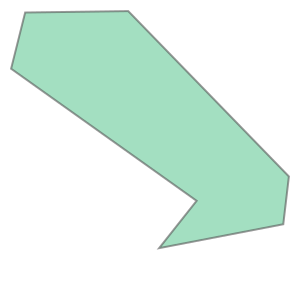


image 1/1 /kaggle/input/hacksaidangerous/cameras/Pgp-com2-K-1-0-9-36/044507d0-d8d7-4d54-b90b-64231d543395.jpg: 384x640 12 persons, 26.8ms
Speed: 2.0ms preprocess, 26.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Прямоугольник: POLYGON ((881.0220947265625 612.240966796875, 881.0220947265625 825.356201171875, 740.7088623046875 825.356201171875, 740.7088623046875 612.240966796875, 881.0220947265625 612.240966796875))


In [ ]:
intersection_area = polygon.intersection(rectangle).area

# Найдите площадь прямоугольника
rectangle_area = rectangle.area

# Рассчитайте процент перекрытия
overlap_percentage = (intersection_area / rectangle_area) * 100

print(f"Процент перекрытия прямоугольника относительно полигона: {overlap_percentage}%")

In [70]:
import ast
from shapely.geometry import Polygon
from shapely.geometry import box
def testi(file_path,imag):
    
    with open(file_path, 'r') as file:
        content = file.read()
    coordinates_str = content.split("\n")[:-1]
    polygon_coordinates = [tuple(map(int, coord.strip("[],").split(','))) for coord in coordinates_str]

    polygon = Polygon(polygon_coordinates)
    results = model.predict(source=imag, stream=True)
    sdsd = pd.DataFrame(columns=['camera_name', 'frame_filename', 'in_danger_zone', 'percent'])
    for result in results:
        hy = result.boxes.xywh.cpu().numpy()
        
        try:
            x, y, w, h = hy[0]
        except IndexError:
            break

        xmin, ymin, xmax, ymax = x, y, x + w, y + h

        rectangle = box(xmin, ymin, xmax, ymax)

        intersection_area = polygon.intersection(rectangle).area

        rectangle_area = rectangle.area

        overlap_percentage = (intersection_area / rectangle_area) * 100
        in_danger_zone = overlap_percentage >= 15
        temp_df = pd.DataFrame({
        'camera_name': ['Pgp-com2-K-1-0-9-36'],  # Замените на ваше значение
        'frame_filename': [file_name],
        'in_danger_zone': [in_danger_zone],
        'percent': [overlap_percentage]
        })
        sdsd = pd.concat([sdsd, temp_df], ignore_index=True)

        # Объединяем временный DataFrame с основным DataFrame

    return sdsd
df = pd.DataFrame(columns=['camera_name', 'frame_filename', 'in_danger_zone', 'percent'])


In [71]:
df

,camera_name,frame_filename,in_danger_zone,percent


In [ ]:
folder_path = '/kaggle/input/testdata/videos/Pgp-com2-K-1-0-9-36'
files = os.listdir(folder_path)
ss = '/kaggle/input/hacksaidangerous/danger_zones/danger_Pgp-com2-K-1-0-9-36.txt'
for file_name in files:
    file_path = os.path.join(folder_path, file_name)
    temp_df = testi(ss,file_path)
    df = pd.concat([df, temp_df], ignore_index=True)

In [55]:
df

,camera_name,frame_filename,in_danger_zone,percent
0,Pgp-com2-K-1-0-9-36,8e4fb35f-ba70-4ff7-a3f0-d1cf1cd566a8.jpg,False,0.000000
1,Pgp-com2-K-1-0-9-36,87f30fe9-9fb3-4ec7-8aa1-1ae669999954.jpg,False,0.000000
2,Pgp-com2-K-1-0-9-36,8f5f6aa9-cd45-4cab-801d-5c1d889ddabb.jpg,False,0.000000
3,Pgp-com2-K-1-0-9-36,9e0ab610-b383-4629-a77c-2a30d01db15f.jpg,True,31.042088
4,Pgp-com2-K-1-0-9-36,96192f98-7086-490a-8bee-67ebcc3efe9d.jpg,False,0.000000
...,...,...,...,...
266,Pgp-com2-K-1-0-9-36,0d7a99f7-bd6f-4ee4-8541-100509e64ea7.jpg,True,100.000000
267,Pgp-com2-K-1-0-9-36,8627164e-9f4a-4719-b600-29c639cf2d3d.jpg,True,91.674108
268,Pgp-com2-K-1-0-9-36,7c339248-8bd5-4b6a-beb5-6df194e64a5a.jpg,True,100.000000
269,Pgp-com2-K-1-0-9-36,8ba3fdb3-3b33-46ba-947c-67ddb76fd60c.jpg,True,100.000000


In [ ]:
folder_path = '/kaggle/input/testdata/videos/Pgp-lpc2-K-0-1-38'
files = os.listdir(folder_path)
ss = '/kaggle/input/hacksaidangerous/danger_zones/danger_Pgp-lpc2-K-0-1-38.txt'
for file_name in files:
    file_path = os.path.join(folder_path, file_name)
    temp_df = testi(ss,file_path)
    df = pd.concat([df, temp_df], ignore_index=True)

In [ ]:
folder_path = '/kaggle/input/testdata/videos/Phl-com3-Shv2-9-K34'
files = os.listdir(folder_path)
ss = '/kaggle/input/hacksaidangerous/danger_zones/danger_Phl-com3-Shv2-9-K34.txt'
for file_name in files:
    file_path = os.path.join(folder_path, file_name)
    temp_df = testi(ss,file_path)
    df = pd.concat([df, temp_df], ignore_index=True)

In [59]:
folder_path = '/kaggle/input/testdata/videos/Php-Angc-K3-1'
files = os.listdir(folder_path)
ss = '/kaggle/input/hacksaidangerous/danger_zones/danger_Php-Angc-K3-1.txt'
for file_name in files:
    file_path = os.path.join(folder_path, file_name)
    temp_df = testi(ss,file_path)
    df = pd.concat([df, temp_df], ignore_index=True)


/tmp/ipykernel_47/4188459900.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  sdsd = pd.concat([sdsd, temp_df], ignore_index=True)
image 1/1 /kaggle/input/testdata/videos/Php-Angc-K3-1/Php-Angc-K3-1_angc4test171.jpg: 384x640 1 person, 9.9ms
Speed: 2.1ms preprocess, 9.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

/tmp/ipykernel_47/4188459900.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  sdsd = pd.concat([sdsd, temp_df], ignore_index=True)
image 1/1 /kaggle/inpu

In [ ]:
folder_path = '/kaggle/input/testdata/videos/Php-Angc-K3-8'
files = os.listdir(folder_path)
ss = '/kaggle/input/hacksaidangerous/danger_zones/danger_Php-Angc-K3-8.txt'
for file_name in files:
    file_path = os.path.join(folder_path, file_name)
    temp_df = testi(ss,file_path)
    df = pd.concat([df, temp_df], ignore_index=True)

In [ ]:
folder_path = '/kaggle/input/testdata/videos/Php-Ctm-K-1-12-56'
files = os.listdir(folder_path)
ss = '/kaggle/input/hacksaidangerous/danger_zones/danger_Php-Ctm-K-1-12-56.txt'
for file_name in files:
    file_path = os.path.join(folder_path, file_name)
    temp_df = testi(ss,file_path)
    df = pd.concat([df, temp_df], ignore_index=True)


In [ ]:
folder_path = '/kaggle/input/testdata/videos/Pgp-com2-K-1-0-9-36'
files = os.listdir(folder_path)
ss = '/kaggle/input/hacksaidangerous/danger_zones/danger_Pgp-com2-K-1-0-9-36.txt'
for file_name in files:
    file_path = os.path.join(folder_path, file_name)
    temp_df = testi(ss,file_path)
    df = pd.concat([df, temp_df], ignore_index=True)


In [ ]:
folder_path = '/kaggle/input/testdata/videos/Php-Ctm-K-1-12-56'
files = os.listdir(folder_path)
ss = '/kaggle/input/hacksaidangerous/danger_zones/danger_Php-Ctm-K-1-12-56.txt'
for file_name in files:
    file_path = os.path.join(folder_path, file_name)
    percent_value = testi(ss,file_path)
    in_danger_zone = percent_value >= 15
    temp_df = pd.DataFrame({
        'camera_name': ['Php-Ctm-K-1-12-56'],  # Замените на ваше значение
        'frame_filename': [file_name],
        'in_danger_zone': [in_danger_zone],
        'percent': [percent_value]
    })

    # Объединяем временный DataFrame с основным DataFrame
    df = pd.concat([df, temp_df], ignore_index=True)

In [ ]:
folder_path = '/kaggle/input/testdata/videos/Php-Ctm-Shv1-2-K3'
files = os.listdir(folder_path)
ss = '/kaggle/input/hacksaidangerous/danger_zones/danger_Php-Ctm-Shv1-2-K3.txt'
for file_name in files:
    file_path = os.path.join(folder_path, file_name)
    percent_value = testi(ss,file_path)
    in_danger_zone = percent_value >= 15
    temp_df = pd.DataFrame({
        'camera_name': ['Php-Ctm-Shv1-2-K3'],  # Замените на ваше значение
        'frame_filename': [file_name],
        'in_danger_zone': [in_danger_zone],
        'percent': [percent_value]
    })

    # Объединяем временный DataFrame с основным DataFrame
    df = pd.concat([df, temp_df], ignore_index=True)

In [ ]:
folder_path = '/kaggle/input/testdata/videos/Php-nta4-shv016309-k2-1-7'
files = os.listdir(folder_path)
ss = '/kaggle/input/hacksaidangerous/danger_zones/danger_Php-nta4-shv016309-k2-1-7.txt'
for file_name in files:
    file_path = os.path.join(folder_path, file_name)
    percent_value = testi(ss,file_path)
    in_danger_zone = percent_value >= 15
    temp_df = pd.DataFrame({
        'camera_name': ['Php-nta4-shv016309-k2-1-7'],  # Замените на ваше значение
        'frame_filename': [file_name],
        'in_danger_zone': [in_danger_zone],
        'percent': [percent_value]
    })

    # Объединяем временный DataFrame с основным DataFrame
    df = pd.concat([df, temp_df], ignore_index=True)

In [ ]:
folder_path = '/kaggle/input/testdata/videos/Spp-210-K1-3-3-5'
files = os.listdir(folder_path)
ss = '/kaggle/input/hacksaidangerous/danger_zones/danger_Spp-210-K1-3-3-5.txt'
for file_name in files:
    file_path = os.path.join(folder_path, file_name)
    percent_value = testi(ss,file_path)
    in_danger_zone = percent_value >= 15
    temp_df = pd.DataFrame({
        'camera_name': ['Spp-210-K1-3-3-5'],  # Замените на ваше значение
        'frame_filename': [file_name],
        'in_danger_zone': [in_danger_zone],
        'percent': [percent_value]
    })

    # Объединяем временный DataFrame с основным DataFrame
    df = pd.concat([df, temp_df], ignore_index=True)

In [ ]:
folder_path = '/kaggle/input/testdata/videos/Spp-210-K1-3-3-6'
files = os.listdir(folder_path)
ss1 = '/kaggle/input/hacksaidangerous/danger_zones/danger_Spp-K1-1-2-6_zone1.txt'
ss2 = '/kaggle/input/hacksaidangerous/danger_zones/danger_Spp-K1-1-2-6_zone2.txt'
ss3 = '/kaggle/input/hacksaidangerous/danger_zones/danger_Spp-K1-1-2-6_zone3.txt'
ss4 = '/kaggle/input/hacksaidangerous/danger_zones/danger_Spp-K1-1-2-6_zone4.txt'

for file_name in files:
    file_path = os.path.join(folder_path, file_name)
    percent_value1 = testi(ss1,file_path)
    percent_value2 = testi(ss1,file_path)
    percent_value3 = testi(ss1,file_path)
    percent_value4 = testi(ss1,file_path)
    percent_value = max(percent_value1,percent_value2,percent_value3,percent_value4)
    in_danger_zone = percent_value >= 15
    temp_df = pd.DataFrame({
        'camera_name': ['Spp-210-K1-3-3-6'],  # Замените на ваше значение
        'frame_filename': [file_name],
        'in_danger_zone': [in_danger_zone],
        'percent': [percent_value]
    })

    # Объединяем временный DataFrame с основным DataFrame
    df = pd.concat([df, temp_df], ignore_index=True)

In [42]:
df

,camera_name,frame_filename,in_danger_zone,percent
0,DpR-Csp-uipv-ShV-V1,8e4fb35f-ba70-4ff7-a3f0-d1cf1cd566a8.jpg,False,0
1,DpR-Csp-uipv-ShV-V1,87f30fe9-9fb3-4ec7-8aa1-1ae669999954.jpg,False,0
2,DpR-Csp-uipv-ShV-V1,8f5f6aa9-cd45-4cab-801d-5c1d889ddabb.jpg,False,0
3,DpR-Csp-uipv-ShV-V1,9e0ab610-b383-4629-a77c-2a30d01db15f.jpg,True,31.042088
4,DpR-Csp-uipv-ShV-V1,96192f98-7086-490a-8bee-67ebcc3efe9d.jpg,False,0
...,...,...,...,...
1233,Spp-210-K1-3-3-6,9aaa5d4b-fff3-4bd8-8a95-b58aaf59cd72.jpg,False,0
1234,Spp-210-K1-3-3-6,97d3aa9e-1534-44ed-9eb1-892b722d1e65.jpg,False,0
1235,Spp-210-K1-3-3-6,941c2c41-4109-4d2d-95b9-47628160abff.jpg,False,0
1236,Spp-210-K1-3-3-6,88b9dbc6-d6e8-4887-b441-2ea9eec92730.jpg,True,44.132921


In [ ]:
folder_path = '/kaggle/input/testdata/videos/DpR-Csp-uipv-ShV-V1'
files = os.listdir(folder_path)
ss = '/kaggle/input/hacksaidangerous/danger_zones/danger_DpR-Csp-uipv-ShV-V1.txt'

for file_name in files:
    file_path = os.path.join(folder_path, file_name)
    temp_df = testi(ss,file_path)
    df = pd.concat([df, temp_df], ignore_index=True)
    
    
folder_path = '/kaggle/input/testdata/videos/Pgp-com2-K-1-0-9-36'
files = os.listdir(folder_path)
ss = '/kaggle/input/hacksaidangerous/danger_zones/danger_Pgp-com2-K-1-0-9-36.txt'

for file_name in files:
    file_path = os.path.join(folder_path, file_name)
    temp_df = testi(ss,file_path)
    df = pd.concat([df, temp_df], ignore_index=True)
    
    
folder_path = '/kaggle/input/testdata/videos/Pgp-lpc2-K-0-1-38'
files = os.listdir(folder_path)
ss = '/kaggle/input/hacksaidangerous/danger_zones/danger_Pgp-lpc2-K-0-1-38.txt'

for file_name in files:
    file_path = os.path.join(folder_path, file_name)
    temp_df = testi(ss,file_path)
    df = pd.concat([df, temp_df], ignore_index=True)
folder_path = '/kaggle/input/testdata/videos/Phl-com3-Shv2-9-K34'
files = os.listdir(folder_path)
ss = '/kaggle/input/hacksaidangerous/danger_zones/danger_Phl-com3-Shv2-9-K34.txt'

for file_name in files:
    file_path = os.path.join(folder_path, file_name)
    temp_df = testi(ss,file_path)
    df = pd.concat([df, temp_df], ignore_index=True)
folder_path = '/kaggle/input/testdata/videos/Php-Angc-K3-1'
files = os.listdir(folder_path)
ss = '/kaggle/input/hacksaidangerous/danger_zones/danger_Php-Angc-K3-1.txt'

for file_name in files:
    file_path = os.path.join(folder_path, file_name)
    temp_df = testi(ss,file_path)
    df = pd.concat([df, temp_df], ignore_index=True)
folder_path = '/kaggle/input/testdata/videos/Php-Angc-K3-8'
files = os.listdir(folder_path)
ss = '/kaggle/input/hacksaidangerous/danger_zones/danger_Php-Angc-K3-8.txt'

for file_name in files:
    file_path = os.path.join(folder_path, file_name)
    temp_df = testi(ss,file_path)
    df = pd.concat([df, temp_df], ignore_index=True)
folder_path = '/kaggle/input/testdata/videos/Php-Ctm-K-1-12-56'
files = os.listdir(folder_path)
ss = '/kaggle/input/hacksaidangerous/danger_zones/danger_Php-Ctm-K-1-12-56.txt'

for file_name in files:
    file_path = os.path.join(folder_path, file_name)
    temp_df = testi(ss,file_path)
    df = pd.concat([df, temp_df], ignore_index=True)
folder_path = '/kaggle/input/testdata/videos/Php-Ctm-Shv1-2-K3'
files = os.listdir(folder_path)
ss = '/kaggle/input/hacksaidangerous/danger_zones/danger_Php-Ctm-Shv1-2-K3.txt'

for file_name in files:
    file_path = os.path.join(folder_path, file_name)
    temp_df = testi(ss,file_path)
    df = pd.concat([df, temp_df], ignore_index=True)
    
    
folder_path = '/kaggle/input/testdata/videos/Php-nta4-shv016309-k2-1-7'
files = os.listdir(folder_path)
ss = '/kaggle/input/hacksaidangerous/danger_zones/danger_Php-nta4-shv016309-k2-1-7.txt'

for file_name in files:
    file_path = os.path.join(folder_path, file_name)
    temp_df = testi(ss,file_path)
    df = pd.concat([df, temp_df], ignore_index=True)
    
folder_path = '/kaggle/input/testdata/videos/Spp-210-K1-3-3-5'
files = os.listdir(folder_path)
ss = '/kaggle/input/hacksaidangerous/danger_zones/danger_Spp-210-K1-3-3-5.txt'

for file_name in files:
    file_path = os.path.join(folder_path, file_name)
    temp_df = testi(ss,file_path)
    df = pd.concat([df, temp_df], ignore_index=True)

folder_path = '/kaggle/input/testdata/videos/Spp-210-K1-3-3-6'
files = os.listdir(folder_path)
ss = '/kaggle/input/hacksaidangerous/danger_zones/danger_Spp-210-K1-3-3-6.txt'

for file_name in files:
    file_path = os.path.join(folder_path, file_name)
    temp_df = testi(ss,file_path)
    df = pd.concat([df, temp_df], ignore_index=True)


In [74]:
df

,camera_name,frame_filename,in_danger_zone,percent
0,Pgp-com2-K-1-0-9-36,8e4fb35f-ba70-4ff7-a3f0-d1cf1cd566a8.jpg,False,0.000000
1,Pgp-com2-K-1-0-9-36,87f30fe9-9fb3-4ec7-8aa1-1ae669999954.jpg,False,0.000000
2,Pgp-com2-K-1-0-9-36,8f5f6aa9-cd45-4cab-801d-5c1d889ddabb.jpg,False,0.000000
3,Pgp-com2-K-1-0-9-36,9e0ab610-b383-4629-a77c-2a30d01db15f.jpg,True,30.705017
4,Pgp-com2-K-1-0-9-36,96192f98-7086-490a-8bee-67ebcc3efe9d.jpg,False,0.000000
...,...,...,...,...
1014,Pgp-com2-K-1-0-9-36,9aaa5d4b-fff3-4bd8-8a95-b58aaf59cd72.jpg,True,41.344149
1015,Pgp-com2-K-1-0-9-36,97d3aa9e-1534-44ed-9eb1-892b722d1e65.jpg,False,14.022761
1016,Pgp-com2-K-1-0-9-36,941c2c41-4109-4d2d-95b9-47628160abff.jpg,False,0.000000
1017,Pgp-com2-K-1-0-9-36,88b9dbc6-d6e8-4887-b441-2ea9eec92730.jpg,False,0.000000


In [ ]:
folder_path = '/kaggle/input/testdata/videos/Spp-210-K1-3-3-6'
files = os.listdir(folder_path)
ss1 = '/kaggle/input/hacksaidangerous/danger_zones/danger_Spp-K1-1-2-6_zone1.txt'
ss2 = '/kaggle/input/hacksaidangerous/danger_zones/danger_Spp-K1-1-2-6_zone2.txt'
ss3 = '/kaggle/input/hacksaidangerous/danger_zones/danger_Spp-K1-1-2-6_zone3.txt'
ss4 = '/kaggle/input/hacksaidangerous/danger_zones/danger_Spp-K1-1-2-6_zone4.txt'

for file_name in files:
    file_path = os.path.join(folder_path, file_name)
    percent_value1 = testi(ss1,file_path)
    percent_value2 = testi(ss1,file_path)
    percent_value3 = testi(ss1,file_path)
    percent_value4 = testi(ss1,file_path)
    df_list = [percent_value1, percent_value2, percent_value3, percent_value4]
    percent_value = max(df['percent'].max() for df in df_list)
    

    in_danger_zone = percent_value >= 15
    temp_df = pd.DataFrame({
        'camera_name': ['Spp-210-K1-3-3-6'],  # Замените на ваше значение
        'frame_filename': [file_name],
        'in_danger_zone': [in_danger_zone],
        'percent': [percent_value]
    })

    # Объединяем временный DataFrame с основным DataFrame
    df = pd.concat([df, temp_df], ignore_index=True)

In [76]:
df

,camera_name,frame_filename,in_danger_zone,percent
0,Pgp-com2-K-1-0-9-36,8e4fb35f-ba70-4ff7-a3f0-d1cf1cd566a8.jpg,False,0.000000
1,Pgp-com2-K-1-0-9-36,87f30fe9-9fb3-4ec7-8aa1-1ae669999954.jpg,False,0.000000
2,Pgp-com2-K-1-0-9-36,8f5f6aa9-cd45-4cab-801d-5c1d889ddabb.jpg,False,0.000000
3,Pgp-com2-K-1-0-9-36,9e0ab610-b383-4629-a77c-2a30d01db15f.jpg,True,30.705017
4,Pgp-com2-K-1-0-9-36,96192f98-7086-490a-8bee-67ebcc3efe9d.jpg,False,0.000000
...,...,...,...,...
1113,Spp-210-K1-3-3-6,9aaa5d4b-fff3-4bd8-8a95-b58aaf59cd72.jpg,False,0.000000
1114,Spp-210-K1-3-3-6,97d3aa9e-1534-44ed-9eb1-892b722d1e65.jpg,False,0.000000
1115,Spp-210-K1-3-3-6,941c2c41-4109-4d2d-95b9-47628160abff.jpg,False,0.000000
1116,Spp-210-K1-3-3-6,88b9dbc6-d6e8-4887-b441-2ea9eec92730.jpg,True,42.661868


In [77]:
# Предположим, что df - ваш DataFrame
df['percent'] = df['percent'].apply(lambda x: round(x / 100, 2))



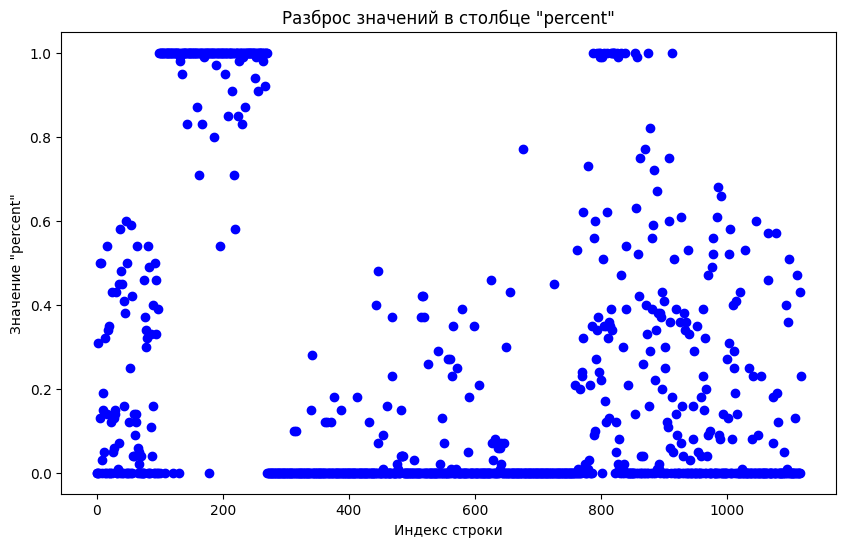

In [78]:
import matplotlib.pyplot as plt

# Предположим, что df - ваш DataFrame
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df)), df['percent'], color='blue')
plt.title('Разброс значений в столбце "percent"')
plt.xlabel('Индекс строки')
plt.ylabel('Значение "percent"')
plt.show()

In [79]:
df.to_csv('subm1.csv', index=False)


In [80]:
df

,camera_name,frame_filename,in_danger_zone,percent
0,Pgp-com2-K-1-0-9-36,8e4fb35f-ba70-4ff7-a3f0-d1cf1cd566a8.jpg,False,0.00
1,Pgp-com2-K-1-0-9-36,87f30fe9-9fb3-4ec7-8aa1-1ae669999954.jpg,False,0.00
2,Pgp-com2-K-1-0-9-36,8f5f6aa9-cd45-4cab-801d-5c1d889ddabb.jpg,False,0.00
3,Pgp-com2-K-1-0-9-36,9e0ab610-b383-4629-a77c-2a30d01db15f.jpg,True,0.31
4,Pgp-com2-K-1-0-9-36,96192f98-7086-490a-8bee-67ebcc3efe9d.jpg,False,0.00
...,...,...,...,...
1113,Spp-210-K1-3-3-6,9aaa5d4b-fff3-4bd8-8a95-b58aaf59cd72.jpg,False,0.00
1114,Spp-210-K1-3-3-6,97d3aa9e-1534-44ed-9eb1-892b722d1e65.jpg,False,0.00
1115,Spp-210-K1-3-3-6,941c2c41-4109-4d2d-95b9-47628160abff.jpg,False,0.00
1116,Spp-210-K1-3-3-6,88b9dbc6-d6e8-4887-b441-2ea9eec92730.jpg,True,0.43
